In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Descriptors import ExactMolWt

In [3]:
df = pd.read_csv("39_Formose reaction_MeOH.csv")#glucose_dry_impcols.csv
print(df.columns)

Index(['Mass', 'Rel. Abundance', 'Molecular Formula', 'Carbon', 'C count',
       'Hydrogen', 'H count', 'Nitrogen', 'N count', 'Oxygen', 'O Count',
       'Sulphur', 'S count', 'Carbon-13', 'C13 count', 'Sulphur-34',
       'S34 Count', 'Unnamed: 17'],
      dtype='object')


In [4]:
# first get rid of empty lines in the mass list by replacing with ''
df.replace('', np.nan, inplace=True)
# also, some 'Mass' values are not numbers
df.dropna(subset=['Mass'], inplace=True)
# now replace NaNs with '' to avoid weird errors
df.fillna('', inplace=True)
df.shape
df.head()


,Mass,Rel. Abundance,Molecular Formula,Carbon,C count,Hydrogen,H count,Nitrogen,N count,Oxygen,O Count,Sulphur,S count,Carbon-13,C13 count,Sulphur-34,S34 Count,Unnamed: 17
0,514.28440,68.8455,,C,26.0,H,44.0,N,1.0,O,7.0,S,1.0,,,,,
1,276.05946,0.5320,*,C,13.0,H,11.0,,,O,6.0,,,13C,1.0,,,
2,290.07511,2.6118,*,C,14.0,H,13.0,,,O,6.0,,,13C,1.0,,,
3,304.09076,6.3988,*,C,15.0,H,15.0,,,O,6.0,,,13C,1.0,,,
4,318.10640,9.5062,*,C,16.0,H,17.0,,,O,6.0,,,13C,1.0,,,


In [5]:
# make a list of exact mass and relative abundance.
mass_list = []
rel_abundance = []
for i in range(len(df)):
    # allow entire spectrum for this one
    if float(df['Mass'].iloc[i]) < 217 and "No Hit" not in df['Molecular Formula'].iloc[i]:
        mass_list.append(float(df['Mass'].iloc[i]))
        rel_abundance.append(float(df['Rel. Abundance'].iloc[i]))
# now, "renormalize" the relative abundance.
highest = max(rel_abundance)
norm_factor = 100.0/highest
normalized_abun = []
for ab in rel_abundance:
    normalized_abun.append(norm_factor*ab)
print(f'{len(mass_list)} items in {mass_list}')


108 items in [192.03836, 206.054, 210.04891, 180.03836, 194.05401, 208.06965, 178.0591, 192.07474, 212.06456, 176.04345, 190.05909, 204.07473, 182.05401, 196.06966, 210.0853, 216.07473, 180.07475, 208.10603, 216.05947, 184.06966, 198.08531, 207.05104, 177.04049, 191.05614, 177.01937, 191.035, 205.05065, 207.02991, 195.02992, 209.04556, 179.03501, 193.05066, 207.0663, 203.035, 179.05614, 177.05575, 191.07139, 205.08703, 205.03539, 197.06669, 211.08234, 213.04047, 195.05105, 209.06669, 197.04556, 211.06121, 175.0401, 189.05574, 203.07138, 181.05066, 195.0663, 209.08195, 181.07179, 201.04048, 215.05612, 165.05576, 179.0714, 207.10268, 189.04048, 203.05613, 185.04557, 199.06121, 213.07686, 187.04009, 201.05573, 215.07138, 193.08704, 213.05573, 183.06631, 197.08195, 211.09759, 205.07177, 173.04558, 201.07686, 215.0925, 181.08705, 209.11833, 195.10269, 193.07178, 161.04559, 189.07687, 203.09251, 175.07649, 189.09213, 173.06083, 187.07648, 201.09212, 215.10776, 203.10777, 177.09213, 205.12341

In [6]:
# formose MOD output
# ../main/glucose/glucose_degradation_output_10mar.txt
formose_mod = pd.read_csv('../main/formose/formose_output.txt', sep='\t', names=['Generation', 'SMILES'])
sim_masses = []
for i in range(len(formose_mod)):
    row = formose_mod.iloc[i]
    mol = MolFromSmiles(row['SMILES'])
    mol_wt = ExactMolWt(mol)
    sim_masses.append(mol_wt)
formose_mod['Mol Wt'] = sim_masses

In [7]:
unique_sim_masses = list(set(sim_masses))
unique_mass_freq = [sim_masses.count(mass) for mass in unique_sim_masses]
highest_freq = max(unique_mass_freq)

norm_freq = [100*(freq/highest_freq) for freq in unique_mass_freq]

print('Unique masses:',len(unique_sim_masses))
print('Frequency of each mass', unique_mass_freq)

Unique masses: 207
Frequency of each mass [4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 4, 2, 4, 12, 4, 2, 4, 3, 10, 12, 14, 13, 4, 5, 8, 1, 1, 2, 2, 20, 5, 62, 4, 37, 18, 20, 8, 4, 4, 1, 2, 5, 67, 2, 48, 106, 90, 35, 64, 17, 4, 13, 2, 7, 46, 2, 45, 75, 296, 67, 324, 54, 91, 144, 45, 18, 8, 4, 31, 38, 265, 68, 858, 82, 444, 712, 558, 155, 208, 49, 9, 26, 34, 162, 30, 400, 869, 791, 2490, 93, 1704, 356, 417, 524, 116, 9, 8, 555, 891, 14, 4078, 755, 4951, 970, 3207, 2880, 2684, 606, 672, 127, 16, 167, 51, 37, 4904, 412, 7689, 5622, 14500, 3193, 552, 7233, 1605, 1542, 290, 1934, 16, 14, 5047, 814, 11241, 5143, 3195, 19435, 11377, 10968, 9528, 2181, 1712, 368, 41, 722, 103, 211, 5280, 5855, 89, 2162, 30, 14, 2, 19, 2, 2, 132, 10, 6, 56, 31, 159, 314, 67, 1, 33, 321, 55, 4, 1, 42, 34, 41, 410, 628, 1569, 3, 457, 44, 113, 31, 768, 10, 7, 5, 45, 23, 130, 117, 371, 378, 936, 77, 37, 90, 246, 27, 14, 2448, 257, 2, 42, 121, 4, 21, 31, 2, 14, 3]


In [8]:
# NOTE: Since the data was collected in negative ESI mode, one must add for the mass of a proton.
print(mass_list[:10])
corrected_mass_list = [mass + 1.007276 for mass in tuple(mass_list)]
print('Update:')
print(corrected_mass_list[:10])

[192.03836, 206.054, 210.04891, 180.03836, 194.05401, 208.06965, 178.0591, 192.07474, 212.06456, 176.04345]
Update:
[193.045636, 207.061276, 211.056186, 181.045636, 195.061286, 209.076926, 179.066376, 193.08201599999998, 213.071836, 177.050726]


In [9]:
print(len(unique_sim_masses))

207


In [10]:
from matplotlib import rc

# Use LaTeX and CMU Serif font.
rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

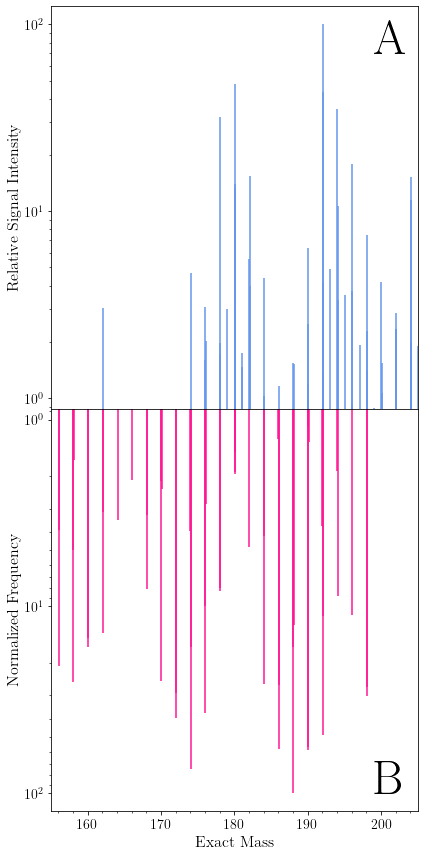

In [14]:
# for some flexibility, create a container for the figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 12), sharex=True) # create a figure object
#ax = fig.add_subplot(111) # create an axis object

# first, draw the experimental spectrum
axes[0].vlines(x=corrected_mass_list, ymin=0, ymax=normalized_abun, color='cornflowerblue')

# now the CNRN
axes[1].vlines(x=unique_sim_masses, ymin=0, ymax=norm_freq, color='deeppink')

#plt.bar(mass_list, rel_abundance, width=0.5)

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[0].set_ylim([0.875, 125])
axes[1].set_ylim([0.875, 125])
axes[0].set_xlim([155, 205])
axes[1].set_xlim([155, 205])

plt.gca().invert_yaxis()

axes[0].tick_params(axis="y", labelsize=14)
axes[0].tick_params(axis="x", labelsize=14)
axes[1].tick_params(axis="y", labelsize=14)
axes[1].tick_params(axis="x", labelsize=14)

axes[1].set_xlabel('Exact Mass',fontsize=16)
axes[0].set_ylabel('Relative Signal Intensity',fontsize=16)
axes[1].set_ylabel('Normalized Frequency',fontsize=16)

# turn on minor ticks

axes[0].minorticks_on()
axes[1].minorticks_on()
axes[0].text(199, 70, 'A', fontsize=48)
axes[1].text(199, 100, 'B', fontsize=48)

#plt.ylabel('Normalized Abundance')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('formose_mirror_plot.png', dpi=300, transparent=True)
plt.show()